<a href="https://colab.research.google.com/github/kabbo12012000/Clustering-DimensionalityReduction/blob/main/Clustering_%26_Dimensionality_Reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [526]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage,fcluster
from sklearn.decomposition import PCA
import plotly.express as px
from sklearn.metrics import confusion_matrix

In [527]:
iris= load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = pd.Series(data= iris['target'] , name='species')

In [528]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [529]:
df['target'].head(-5)

,target
0,0
1,0
2,0
3,0
4,0
...,...
140,2
141,2
142,2
143,2


In [530]:
X = df.drop('target',axis=1).values
y=df['target'].values

scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)

In [531]:
fig = px.scatter(df)
fig.show()

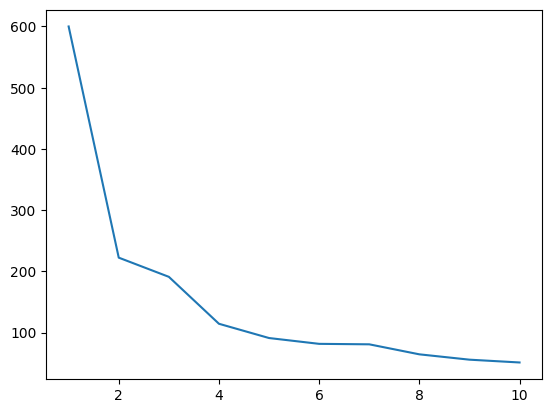

In [532]:
inertia =[]
K = range(1,11)
for k in K:
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(x_scaled)
  inertia.append(kmeans.inertia_)
plt.plot(K,inertia)
plt.show()

In [533]:
kmeans_model = KMeans(n_clusters=3,random_state=42)
cluster1 = kmeans_model.fit_predict(x_scaled)

In [534]:
df['cluster'] = cluster1
cm_original = confusion_matrix(df['cluster'], cluster1)
y1 = df['cluster']

In [535]:
fig = px.scatter(df, x='petal length (cm)', y='petal width (cm)', color='cluster', title='KMeans Clustering')
fig.show()

In [536]:
fig = px.scatter(df, x='sepal length (cm)', y='sepal width (cm)', color='cluster', title='KMeans Clustering (Sepal Length vs Sepal Width)')
fig.show()

In [537]:
fig = px.scatter_3d(df, x='sepal length (cm)', y='sepal width (cm)', z='petal length (cm)', color='cluster', title='KMeans Clustering (3D: Sepal Length, Sepal Width, Petal Length)')
fig.show()

In [538]:
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_scaled)
print("Explained variance ratio:", pca.explained_variance_ratio_)

Explained variance ratio: [0.72962445 0.22850762]


In [539]:
kmeans_model = KMeans(n_clusters=3,random_state=4)
cluster2 = kmeans_model.fit_predict(x_pca)
df['cluster'] = cluster2
cm_pca = confusion_matrix(df['cluster'], cluster2)
y2 = df['cluster']

In [540]:
fig = px.scatter(df, x='sepal length (cm)', y='sepal width (cm)', color='cluster', title='KMeans Clustering')
fig.show()

In [541]:
fig = px.scatter(df, x='petal length (cm)', y='petal width (cm)', color='cluster', title='KMeans Clustering')
fig.show()

In [542]:
fig = px.scatter_3d(df, x='petal length (cm)', y='petal width (cm)', z='sepal length (cm)', color='cluster', title='KMeans')
fig.show()

In [543]:
fig = px.scatter_3d(df, x='sepal length (cm)', y='sepal width (cm)', z='petal length (cm)', color='cluster', title='KMeans')
fig.show()

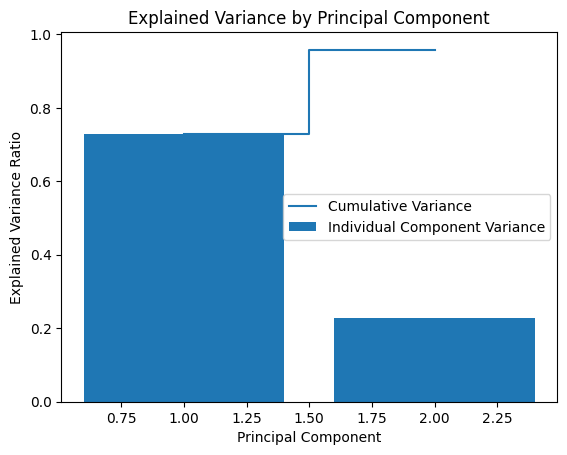

In [544]:
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, label="Individual Component Variance")
plt.step(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum(), where="mid", label="Cumulative Variance")
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Principal Component')
plt.legend()
plt.show()

In [545]:
from sklearn.metrics import accuracy_score, confusion_matrix
print("Confusion Matrix (Original Data):")

print(cm_original, "\n")

print("Confusion Matrix (PCA-Reduced Data):")
print(cm_pca, "\n")

Confusion Matrix (Original Data):
[[96  0  0]
 [ 0 33  0]
 [ 0  0 21]] 

Confusion Matrix (PCA-Reduced Data):
[[45  0  0]
 [ 0 50  0]
 [ 0  0 55]] 



In [546]:
linkage = linkage(x_scaled, method='ward')

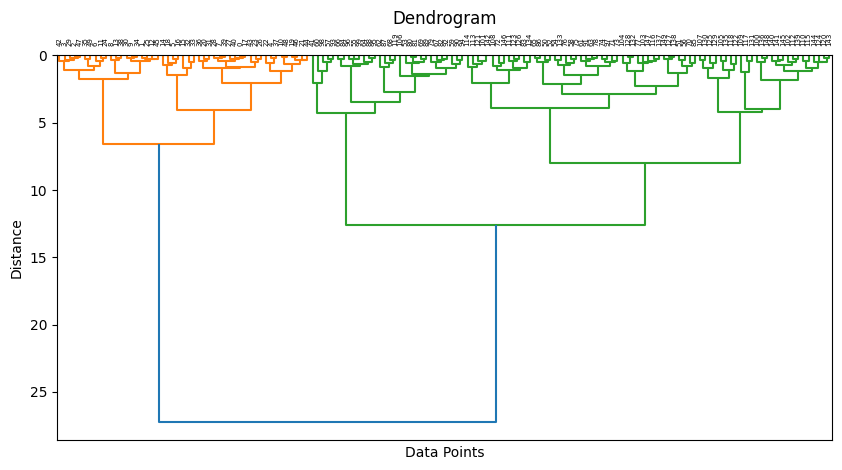

In [563]:

plt.figure(figsize=(10, 5))
dendrogram(linkage, orientation='bottom',distance_sort='ascending', show_leaf_counts=True)
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

In [564]:
hc_cluster = fcluster(linkage, t=3, criterion='maxclust')
df['cluster'] = hc_cluster
cm_hc = confusion_matrix(df['cluster'], hc_cluster)
y3 = df['cluster']

In [565]:
fig = px.scatter(df, x='petal length (cm)', y='petal width (cm)', color=hc_cluster, title='Hierarchical Clustering')
fig.show()

In [566]:
print("Confusion Matrix (HC Data):")
print(cm_hc, "\n")

Confusion Matrix (HC Data):
[[49  0  0]
 [ 0 30  0]
 [ 0  0 71]] 



In [573]:
db = DBSCAN(eps=0.5, min_samples=5)
db_cluster = db.fit_predict(x_scaled)
df['cluster'] = db_cluster
cm_dbscan = confusion_matrix(df['cluster'], db_cluster)
y4 = df['cluster']

In [574]:
fig= px.scatter(df, x='petal length (cm)', y='petal width (cm)', color=db_cluster, title='DBSCAN Clustering', color_discrete_sequence=1)
fig.show()

In [575]:
print("Confusion Matrix (Original Data):")
print(cm_dbscan)

Confusion Matrix (Original Data):
[[34  0  0]
 [ 0 45  0]
 [ 0  0 71]]


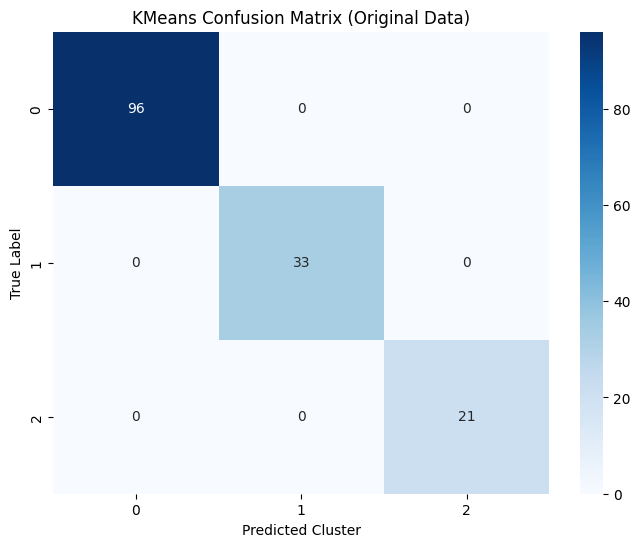

In [554]:
cm_original = confusion_matrix(y1, cluster1)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_original, annot=True, fmt='d', cmap='Blues')
plt.title('KMeans Confusion Matrix (Original Data)')
plt.xlabel('Predicted Cluster')
plt.ylabel('True Label')
plt.show()

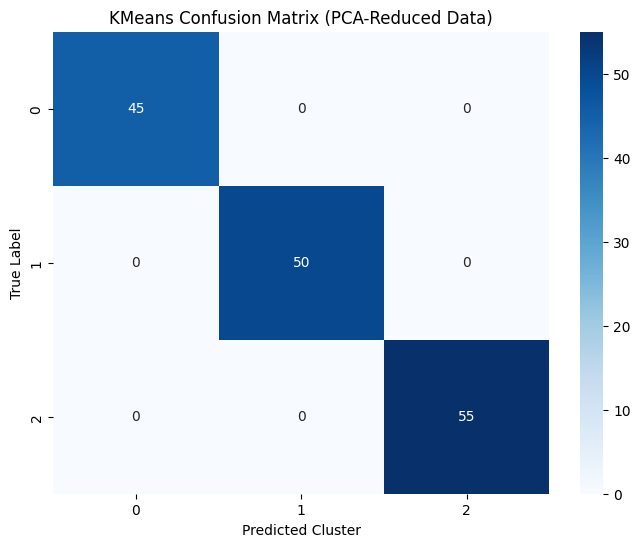

In [555]:
cm_pca = confusion_matrix(y2, cluster2)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_pca, annot=True, fmt='d', cmap='Blues')
plt.title('KMeans Confusion Matrix (PCA-Reduced Data)')
plt.xlabel('Predicted Cluster')
plt.ylabel('True Label')
plt.show()

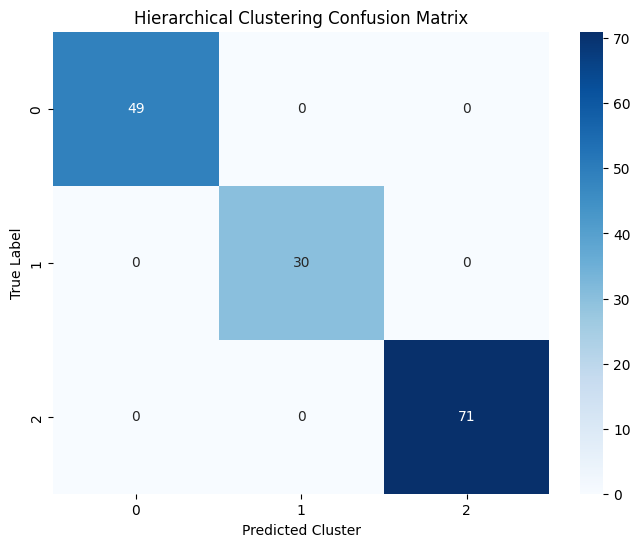

In [556]:
cm_hc = confusion_matrix(y3, hc_cluster)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_hc, annot=True, fmt='d', cmap='Blues')
plt.title('Hierarchical Clustering Confusion Matrix')
plt.xlabel('Predicted Cluster')
plt.ylabel('True Label')
plt.show()

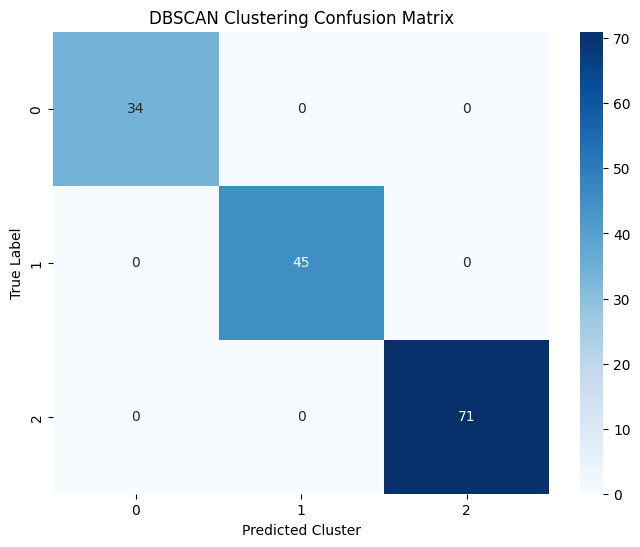

In [557]:
cm_dbscan = confusion_matrix(y4, db_cluster)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dbscan, annot=True, fmt='d', cmap='Blues')
plt.title('DBSCAN Clustering Confusion Matrix')
plt.xlabel('Predicted Cluster')
plt.ylabel('True Label')
plt.show()